## CAPITOLO 7 : ESERCIZI SULLA REGRESSIONE LINEARE

In [16]:
from scipy.stats import t
import numpy as np
import matplotlib.pyplot as plt
X = np.array([2010,2011,2012,2013,2014,2015,2016,2017])
Y = np.array([10,11,10.5,12,10,12,11,13])

In [14]:
#determinare retta di regressione

x_bar= np.mean(X)
y_bar= np.mean(Y)
n= X.size
sig_xy = np.sum(X*Y - x_bar*y_bar)/n
sig_x2 = np.sum(X**2 - x_bar**2)/n

b_0 = y_bar - sig_xy/sig_x2 * x_bar
b_1 = sig_xy/sig_x2

print(f"coefficiente b_0 ={b_0}  b_1={b_1}")

coefficiente b_0 =-552.1130952380953  b_1=0.27976190476190477


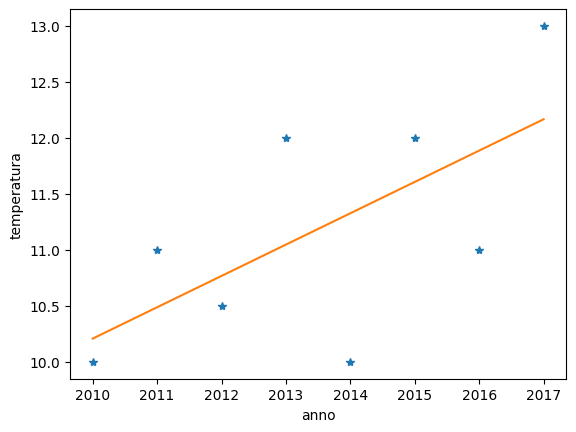

In [19]:
x= np.linspace(2010,2017) #range intervallo della x
y= b_0 + b_1*x  

plt.plot(X,Y,'*')
plt.plot(x,y)
plt.xlabel("anno")
plt.ylabel("temperatura")
plt.show()

In [23]:
#INTERVALLI DI CONFIDENZA AL 95% PER B0 E B1 
y_hat = b_0 + b_1*X
r= Y - y_hat
S2 = np.sum(r**2)/(n-2)
S = np.sqrt(S2)

alfa = 1-0.95
T = t.ppf(1-alfa/2, n-2)
b_0l= b_0 - S * np.sqrt(1/n + x_bar**2/(n*sig_x2)) * T
b_0r= b_0 + S * np.sqrt(1/n + x_bar**2/(n*sig_x2)) * T
b_1l= b_1 - S/(np.sqrt(sig_x2) * np.sqrt(n)) * T
b_1r= b_1 + S/(np.sqrt(sig_x2) * np.sqrt(n)) * T

print(f"intervallo confidenza  b_0 = [{b_0l} {b_0r}]")
print(f"intervallo confidenza  b_1 = [{b_1l} {b_1r}]")

intervallo confidenza  b_0 = [-1223.6419698314085 119.41577935521775]
intervallo confidenza  b_1 = [-0.05375110233645042 0.61327491186026]


In [27]:
#determinare il coefficiente di Pearson

sig_y2= np.sum((Y- y_bar)**2)/n
R2 = sig_xy**2/(sig_x2*sig_y2)

print("coefficiente di determinazione:", R2)
print("coefficiente di  Pearson/ correlazione lineare :", np.sqrt(R2))

coefficiente di determinazione: 0.4125116713352007
coefficiente di  Pearson/ correlazione lineare : 0.6422707149911171


In [42]:
# Si testi la significativit`a della regressione usando alfa = 0.10

#IPOTESI NULLA B=0
#IPOTESI ALTERNATIVA B1#0

alfa = 0.10
T = t.ppf(1-alfa/2, n-2)

T1  = np.sqrt(n) * (b_1/S) * np.sqrt(sig_x2)

if(np.abs(T1)> T):
    print("rigetto ipotesi nulla quindi c'è un effettiva dipendenza tra anno e temperatura")
else:
    print("non possiamo dire niente")

rigetto ipotesi nulla quindi c'è un effettiva dipendenza tra anno e temperatura


In [47]:
#DETERMINARE IL VALORE DELLA TEMPERATURA ANNO 2022 E IL SUO INTERVALLO DI CONFIDENZA AL 95%
x_anno = 2022
y= b_0 + b_1*x_anno
print("valore temperatura previsto per anno 2022 :",y)


i_cl= b_0 - b_1*x_anno - np.sqrt(1/n + ((x_anno - x_bar)**2/(n*sig_x2))) * T
i_cr= b_0 + b_1*x_anno - np.sqrt(1/n + ((x_anno - x_bar)**2/(n*sig_x2))) * T

print(f"intervallo confidenza previsione: [{i_cl},{i_cr}]")

valore temperatura previsto per anno 2022 : 13.565476190476147
intervallo confidenza previsione: [-1120.4312738441663,10.925869012976502]


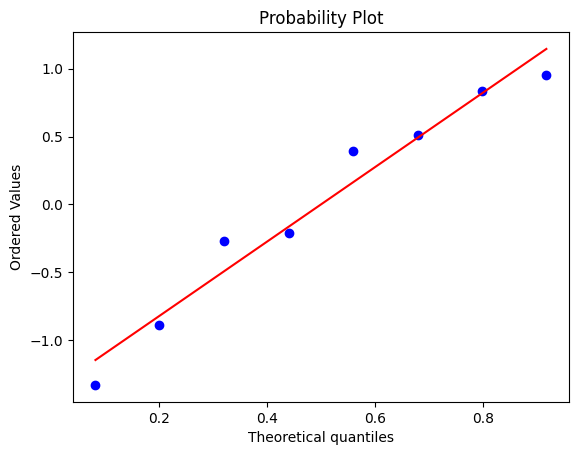

In [55]:
#i residui seguono una distribuzione normale? 
from scipy.stats import probplot,uniform
fig,ax = plt.subplots(1,1)
probplot(r, dist=uniform, plot= ax)
plt.show()